In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mfp.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587186 entries, 0 to 587185
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         587186 non-null  int64  
 1   date            587186 non-null  object 
 2   sequence        587186 non-null  int64  
 3   food_ids        587186 non-null  object 
 4   total_calories  587186 non-null  int64  
 5   total_carbs     587186 non-null  int64  
 6   total_fat       586309 non-null  float64
 7   total_protein   586309 non-null  float64
 8   total_sodium    585881 non-null  float64
 9   total_sugar     585879 non-null  float64
 10  goal_calories   585264 non-null  float64
 11  goal_carbs      585261 non-null  float64
 12  goal_fat        559873 non-null  float64
 13  goal_protein    559868 non-null  float64
 14  goal_sodium     519466 non-null  float64
 15  goal_sugar      519196 non-null  float64
dtypes: float64(10), int64(4), object(2)
memory usage: 71.7+ 

In [4]:
data.head()

,user_id,date,sequence,food_ids,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar
0,1,2014-09-15,1,"[1, 2, 3, 4, 4]",2430,96,37.0,50.0,855.0,63.0,1572.0,196.0,52.0,79.0,2300.0,59.0
1,1,2014-09-16,1,"[5, 1, 2, 3, 6, 7]",1862,158,54.0,114.0,2215.0,100.0,1832.0,229.0,61.0,92.0,2300.0,69.0
2,1,2014-09-17,1,"[1, 2, 3, 6, 8, 9, 10]",2251,187,60.0,98.0,1765.0,105.0,1685.0,210.0,56.0,85.0,2300.0,63.0
3,1,2014-09-18,1,"[1, 6, 2, 3, 11, 12]",2001,113,81.0,202.0,1101.0,71.0,1597.0,199.0,53.0,80.0,2300.0,60.0
4,1,2014-09-19,1,"[1, 7, 13, 12, 2, 3, 12, 12]",2158,180,89.0,115.0,1998.0,84.0,1589.0,198.0,53.0,80.0,2300.0,60.0


In [5]:
data.isna().sum()

user_id               0
date                  0
sequence              0
food_ids              0
total_calories        0
total_carbs           0
total_fat           877
total_protein       877
total_sodium       1305
total_sugar        1307
goal_calories      1922
goal_carbs         1925
goal_fat          27313
goal_protein      27318
goal_sodium       67720
goal_sugar        67990
dtype: int64

In [6]:
data.describe()

,user_id,sequence,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar
count,587186.000000,587186.000000,5.871860e+05,587186.000000,586309.000000,586309.000000,585881.000000,585879.000000,585264.000000,585261.000000,559873.000000,559868.000000,519466.000000,519196.000000
mean,4946.928031,4.004532,1.421923e+03,153.679057,71.235077,93.821524,1157.984207,407.563147,1613.422573,194.222680,90.101536,157.212782,1446.919333,411.366736
std,2844.719822,1.341577,2.284502e+03,355.777029,277.018504,289.062514,2049.176072,907.108966,722.874981,352.425203,240.765991,390.169810,1166.553691,886.227384
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2513.000000,3.000000,1.038000e+03,76.000000,29.000000,40.000000,30.000000,22.000000,1314.000000,122.000000,46.000000,70.000000,56.000000,45.000000
50%,4928.000000,4.000000,1.403000e+03,135.000000,49.000000,66.000000,690.000000,51.000000,1630.000000,178.000000,58.000000,96.000000,2300.000000,64.000000
75%,7427.000000,5.000000,1.766000e+03,191.000000,72.000000,98.000000,1982.000000,139.000000,1991.000000,227.000000,77.000000,135.000000,2300.000000,100.000000
max,9897.000000,6.000000,1.200800e+06,210865.000000,132088.000000,114949.000000,960000.000000,168015.000000,26068.000000,154417.000000,38128.000000,102945.000000,23009.000000,35055.000000


# EDA

Lets try to analyze people's food preferences and find the most consumed substances to aid the stores in better and efficient stocking of items.

In [7]:
import json
with open('foods.json') as json_file:
     dishes_list = json.load(json_file)
#food_names['Uncle Tobys Australia - Vita Brits']
inv_dishes_list = {v: k for k, v in dishes_list.items()}

In [8]:
def link_food(names,lst):
    for i in lst[1:-1].split(","):
        i = i.replace(' ','')
        names[i] = names.get(i,0)+1
        
def popular_foods(df,pops):
    names = {}
    df["food_ids"].apply(lambda lst: link_food(names,lst))
    pop_ids = list(sorted(names.items(), key=lambda item: item[1]))
    pop_ids = [k for k,v in pop_ids]
    pop_ids.reverse()
    return pop_ids[:10]
data["month"] = data["date"].apply(lambda x: x[5:7])
max_food_in_month = data.groupby(['month']).apply(lambda x: popular_foods(x,10))
del data["month"]

popdf = pd.DataFrame(max_food_in_month)
popdf = popdf.apply(lambda x: x[0], axis = 1, result_type ='expand').reset_index()
popdf.columns = ["month","1","2","3","4","5","6","7","8","9","10"]
for col in popdf.columns[1:]:
    popdf[col] = popdf[col].apply(lambda food_id: inv_dishes_list[int(food_id)])

In [9]:
popdf

,month,1,2,3,4,5,6,7,8,9,10
0,01,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Butter - Salted,Apples - Raw,Strawberries - Raw,Blueberries - Raw,Cucumber - With peel,Carrots - Raw
1,02,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Strawberries - Raw,Blueberries - Raw,Butter - Salted,Apples - Raw,Cucumber - With peel,Carrots - Raw
2,03,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Strawberries - Raw,Spinach - Raw,Butter - Salted,Apples - Raw,Chicken - Breast,Cucumber - With peel,Blueberries - Raw
3,04,Coffee - Brewed from grounds,Quick Added Calories,Strawberries - Raw,Bananas - Raw,Apples - Raw,Spinach - Raw,Chicken - Breast,Carrots - Raw,Blueberries - Raw,Butter - Salted
4,09,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Cucumber - With peel,Apples - Raw,Oil - Olive,Butter - Salted,Carrots - Raw,Strawberries - Raw
5,10,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Apples - Raw,Spinach - Raw,Oil - Olive,Butter - Salted,Cucumber - With peel,Carrots - Raw,Peppers - Sweet
6,11,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Apples - Raw,Spinach - Raw,Butter - Salted,Carrots - Raw,Cucumber - With peel,Oil - Olive,Chicken - Breast
7,12,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Apples - Raw,Butter - Salted,Cucumber - With peel,Carrots - Raw,Eggs - Fried (whole egg),Chicken - Breast


Removing columns with goal calories missing and reading the date column as datetime

In [10]:
data['date'] = pd.to_datetime(data['date'])
data = data.drop(data[data.goal_calories.isnull()].index)

### Active users analysis

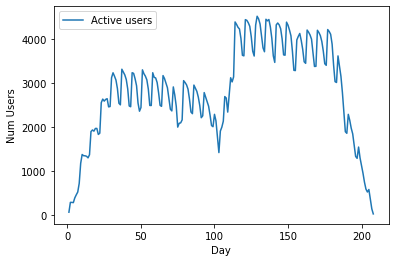

In [11]:
datedf = pd.DataFrame(data.groupby('date').user_id.unique())
datedf.columns = ['user_ids']
datedf['user_count'] = [len(i) for i in datedf['user_ids']]
plt.plot([i for i in range(1, 209)], datedf['user_count'], label='Active users')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

Here, The number of active users drastically increases at first. There is a steep drop in the middle and the date was december 25. The explaination could be that a big chunk of the users were with their families and went off the diet during this time to celebrate. The macros are not available at most family dinners to input into the app either, making tracking much harder.

Following this, there is a dramatic rise in the number of users around the new year time. The reason for this could be that a lot of people would have put on holiday weight and would be motivated to shed off the pounds after the holidays. The fact that it was a new year also motivates people to make healthy changes. Hence a large numbers of users must have started using the app seriously during this time. 

There was a serious drop in users towards the end of March. The most plausible explaination of this is that a lot of users who decided to start using MyFitnessPal on January 1, were on a 3 month diet (one of the most popular diet durations as it is not too long to induce starting anxiety and not too short to be ineffective). Also, a few of the users must have stopped from not noticing any benefits or lack of motivation.

<AxesSubplot:xlabel='sequence'>

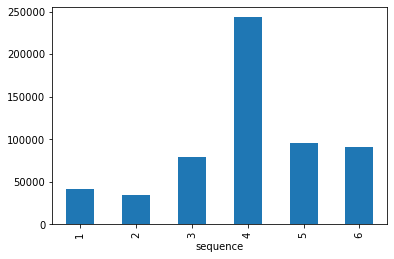

In [12]:
data.groupby("sequence")["user_id"].count().plot(kind='bar')

It can be seen that most people have 4 meals a day

<AxesSubplot:xlabel='user_id'>

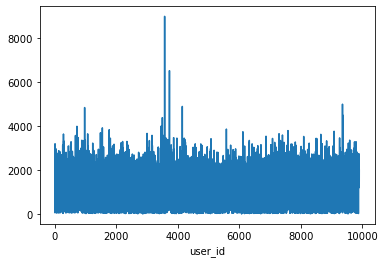

In [13]:
data.groupby("user_id")["goal_calories"].mean().plot()

In [14]:
print('Mean difference between first and last day:',(data.groupby("user_id")["date"].max() - data.groupby("user_id")["date"].min()).mean())
print('Median difference between first and last day:',(data.groupby("user_id")["date"].max() - data.groupby("user_id")["date"].min()).median())
print('Total difference between first and last day:',(data['date'].max() - data['date'].min()))

Mean difference between first and last day: 114 days 02:48:54.306569344
Median difference between first and last day: 136 days 00:00:00
Total difference between first and last day: 207 days 00:00:00


Since the mean is lower than the median, it can be inferred that the data is skewed by users having a very low number of days between their first and last day

<AxesSubplot:ylabel='Count'>

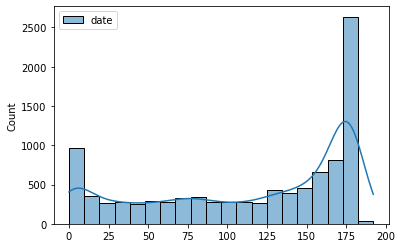

In [15]:
ddf = pd.DataFrame(data.groupby("user_id")["date"].max() - data.groupby("user_id")["date"].min())
ddf['date'] = pd.to_numeric(ddf['date'].dt.days, downcast='integer')
sns.histplot(data=ddf, bins = 20, kde=True)

<AxesSubplot:ylabel='Count'>

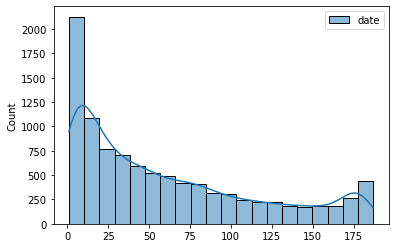

In [16]:
ddf1 = pd.DataFrame(data.groupby("user_id")["date"].count())
sns.histplot(data=ddf1, bins = 20, kde=True)

A large number of users used the app for just 72 hours, with the majority of them (422) just using the app on the first day. This might be the result of users simply wanting to try the app and see how tracking calories worked, and then deciding against doing it or planning to come back to it another day.

Following this drastic drop, the users logging food gradually declines. The reason for this is most likely lack of motivation and will power. It could also be the case that the users did not notice any benefit and hence decided to quit.

However, there is a significant rise in the total number of days logged as we approach the 180 mark. 178 days was the highest with 1190 users. This could be the result of availability of a large amount of 180 days diet challenges online.

In [17]:
print('Mean days used:',(data.groupby("user_id")["date"].count().mean()))
print('Median days used:',(data.groupby("user_id")["date"].count().median()))
print('Max days used:',(data.groupby("user_id")["date"].count().max()))

Mean days used: 59.333333333333336
Median days used: 42.0
Max days used: 187


Since the mean is higher than the median, it can be inferred that the data is skewed by some users who used the app for a high number of days. It is delightful to see that there were users who were so consistent and determined that they ended up skewing the distribution.

In [18]:
ddf.groupby('date')['date'].count().sort_values().tail(30)

date
140      60
157      60
165      61
143      62
148      63
155      67
147      68
154      70
163      70
162      71
160      72
166      76
164      76
167      77
2        80
172      82
161      85
168     101
171     105
169     110
173     117
170     119
1       127
174     128
175     197
176     225
179     370
177     391
0       422
178    1190
Name: date, dtype: int64

Calculating the days missed below

<AxesSubplot:ylabel='Count'>

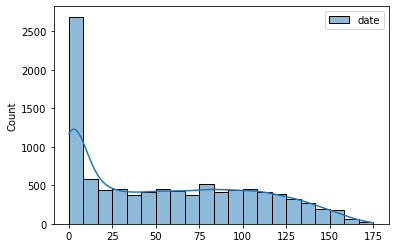

In [19]:
days_missed = ddf - ddf1 + 1
sns.histplot(data=days_missed, kde=True)

It appears that over a quarter of the users missed less than 10 days. However, this could also be due to users who used the app for less than 10 days. Let us further investigate this by dropping users with less than 10 days of usage.

In [20]:
morethan_10days_users = list(ddf[ddf['date']>10].index)

<AxesSubplot:ylabel='Count'>

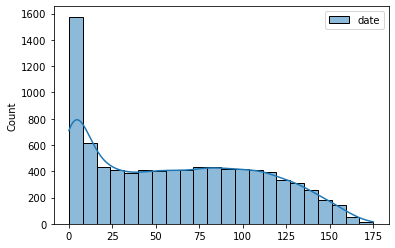

In [21]:
days_more_than_10 = days_missed[days_missed.index.isin(morethan_10days_users)]
sns.histplot(data=days_more_than_10, kde=True)

The number has come down by over a 1000 users now. However, it is still quite high as compared to the rest of the distribution. Despite this, there is still the possibility that this spike is being strongly influenced by users with very few days logged.
Now, let us just look at the really serious users with over 90 days logged.

<AxesSubplot:ylabel='Count'>

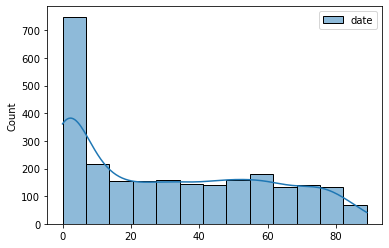

In [22]:
morethan_90days_users = list(ddf1[ddf1['date']>90].index)
days_more_than_90 = days_missed[days_missed.index.isin(morethan_90days_users)]
sns.histplot(data=days_more_than_90, kde=True)

From this it can be inferred that there are aroud 1100 people who consistently tracked food for 3 months or more and missed under 20 days during this. These users can be considered serious and committed and make up about 1/9th of the total population in this dataset. The exact number of serious users is calculated below.

In [23]:
print('Fraction of serious users:',len(days_more_than_90[days_more_than_90.date<20])/len(data['user_id'].unique()))

Fraction of serious users: 0.1111111111111111


In [24]:
print('Days missed mean:',days_missed.mean())
print('Days missed median:',days_missed.median())

Days missed mean: date    55.783962
dtype: float64
Days missed median: date    49.0
dtype: float64


In [25]:
under3days = list(ddf[ddf['date']<4].index)
days_less_than_3 = data[data.index.isin(under3days)]
len(days_less_than_3.user_id.unique())

130

In [26]:
ddf1

,date
user_id,
1,173
2,60
3,7
4,27
5,179
...,...
9893,22
9894,3
9895,169


<AxesSubplot:xlabel='user_id'>

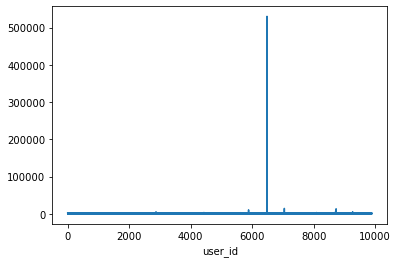

In [27]:
data.groupby("user_id")["total_calories"].mean().plot()

It can be seen clearly that there are outliers in the toal_calories column. Removing the entries with the total_calories over 30000 as this is close to humanely impossible.

In [28]:
data = data.drop(data[data.total_calories >30000].index)

Percentage exceeding: 0.15421271418432525


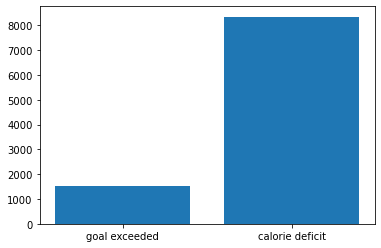

In [29]:
nd = (data.groupby("user_id")["total_calories"].mean() - data.groupby("user_id")["goal_calories"].mean())
freqs = [-1 if i < 100 else 1 for i in nd]
c1 = 0
_c1 = 0
for i in freqs:
    if i>0:
        c1 += 1
    else:
        _c1 += 1
x = [c1, _c1]
y = ['goal exceeded','calorie deficit']
plt.bar(y,x)
print('Percentage exceeding:',c1/(c1+_c1))

It is delightful to see that just 15% of the users have significantly exceeded their calorie goal for the days logged by over 100 calories. The remaining 85% succesfully stuck to their goal overall.

In [30]:
def boxplots(data):
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    i = 0
    j = 0
    for feature in data.columns.values:
        if feature == 'dates_list':
            continue
        sns.boxplot(ax=axes[i, j], x=data[feature])
        if j == 3:
            j = 0
            i += 1
        else:
            j += 1

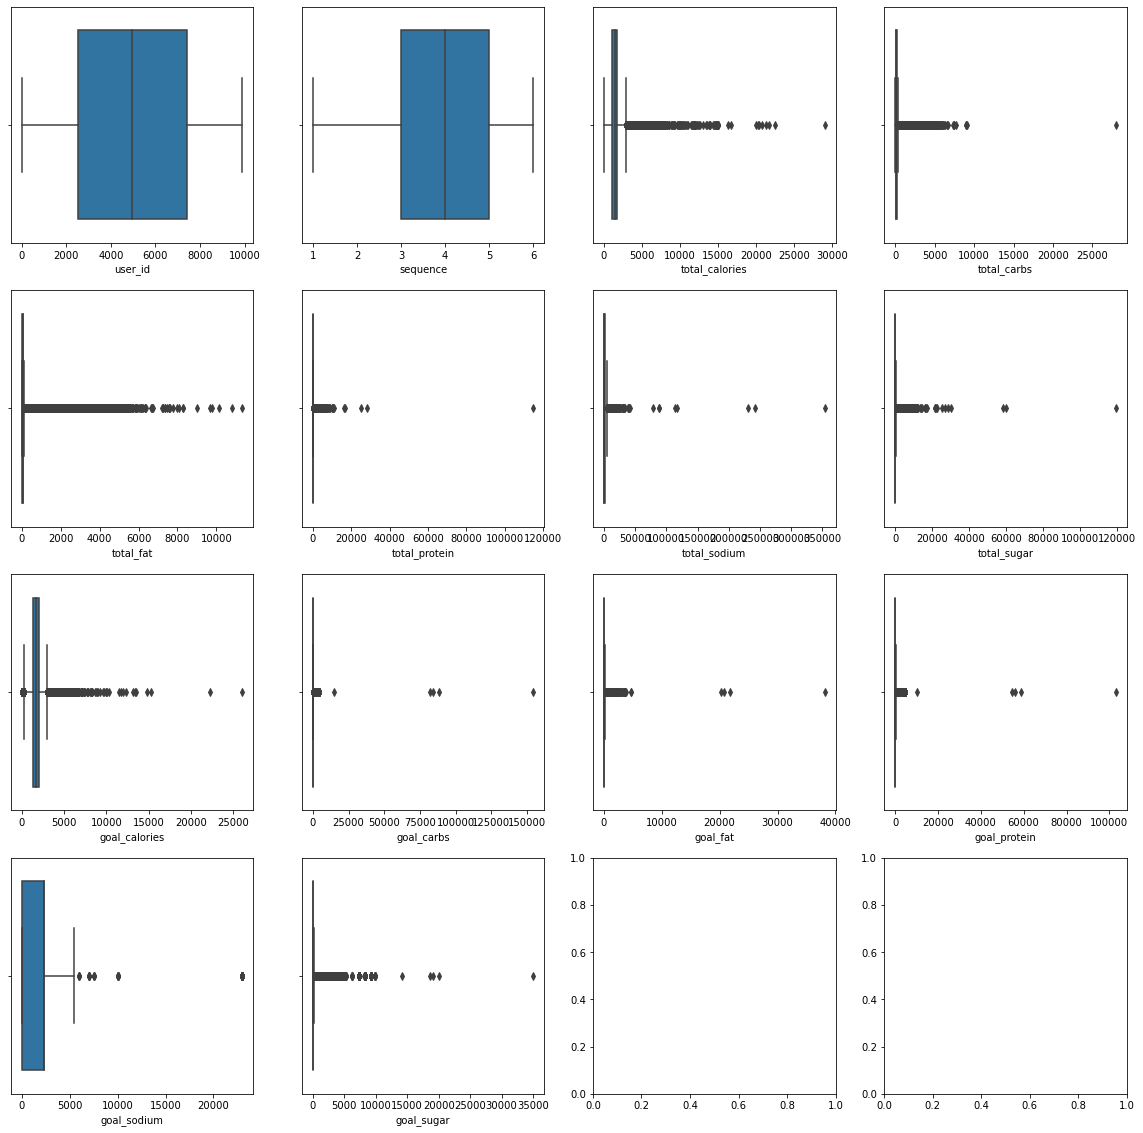

In [31]:
boxplots(data.drop(['date','food_ids'],axis=1))

<AxesSubplot:xlabel='total_calories', ylabel='Count'>

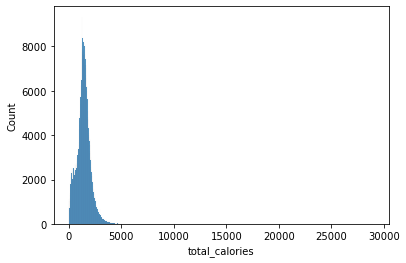

In [32]:
sns.histplot(data=data, x='total_calories')

<AxesSubplot:xlabel='goal_calories', ylabel='Count'>

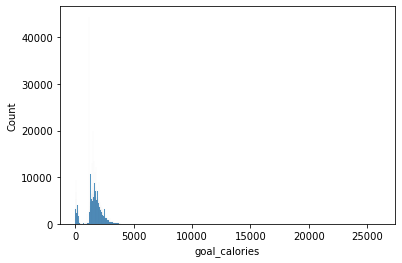

In [33]:
sns.histplot(data=data, x='goal_calories')

Let us now see if most users reached their goal.

In [34]:
cdf = pd.DataFrame(data.groupby('user_id')['total_calories','goal_calories'].mean())
cdf['goal_met'] = cdf['goal_calories'] - cdf['total_calories']
cdf['goal_met'] = [1 if i>=0 else 0 for i in cdf['goal_met']]

C:\Users\srika\AppData\Local\Temp/ipykernel_13720/1608088932.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cdf = pd.DataFrame(data.groupby('user_id')['total_calories','goal_calories'].mean())


Percentage met: 0.8156747439927


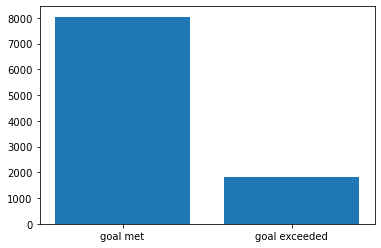

In [35]:
c1 = 0
_c1 = 0
for i in cdf['goal_met']:
    if i==1:
        c1 += 1
    else:
        _c1 += 1
x = [c1, _c1]
y = ['goal met','goal exceeded']
plt.bar(y,x)
print('Percentage met:',c1/(c1+_c1))

Outlier removal

In [36]:
#print(data[data.total_calories == data.total_calories.max()])
#data = data.drop(axis=0,index=417957)

Most logged first day

In [37]:
import datetime
daysCount=[0,0,0,0,0,0,0]
for i in data['user_id'].unique():
    date = data[data["user_id"]==i].head(1)['date'].values[0]
    daysCount[((date.astype('datetime64[D]').view('int64') - 4) % 7)]+=1

<AxesSubplot:xlabel='days', ylabel='quantities'>

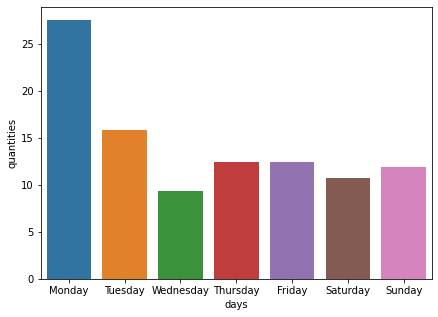

In [38]:
res = np.dot([i / np.sum(daysCount) for i in daysCount],100)
fig, ax = plt.subplots(figsize=(7,5))
df=pd.DataFrame({'days':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],'quantities': res})
sns.barplot(x='days',y='quantities',data=df,ax=ax)

In [39]:
def nutrient_charts(df,nutrient_name,goal_nutrient_name,t1,t2):
    avg = df.groupby(['user_id']).apply(lambda x: x[nutrient_name].sum()/len(x)).reset_index()
    goal = df.groupby(['user_id']).apply(lambda x: x[goal_nutrient_name].sum()/len(x)).reset_index()
    avg.columns = ["user_id", "avg_nut"]
    goal.columns = ["user_id", "goal_avg_nut"]

    fig, ax =plt.subplots(1,3,figsize=(17,7))
    _max = max(df[nutrient_name].max(),df[goal_nutrient_name].max())
    ax[0].hist(avg[avg['avg_nut']<t1]['avg_nut'], range=[0,t1], color='Red', histtype='step')
    ax[0].hist(goal[goal['goal_avg_nut']<t1]['goal_avg_nut'], range=[0,t1], color='Green', histtype='step')
    ax[0].legend(('Total', 'Goal'), loc="upper right")
    ax[1].hist(avg['avg_nut'], range=[t1,t2], color='Red',histtype='step')
    ax[1].hist(goal['goal_avg_nut'], range = [t1,t2], color='Green', histtype='step')
    ax[1].legend(('Total', 'Goal'), loc="upper right")
    ax[2].hist(avg[avg['avg_nut']>t2]['avg_nut'], range=[t2,_max], color='Red', histtype='step')
    ax[2].hist(goal[goal['goal_avg_nut']>t2]['goal_avg_nut'], range=[t2,_max], color='Green', histtype='step')
    ax[2].legend(('Total', 'Goal'),loc="upper right")
    
    under_minimum = len(avg[avg['avg_nut'] < t1])
    above_minimum = len(avg[avg['avg_nut'] > t2])
    total = avg.user_id.nunique()

    
    print(f'no risk: {100*(1-(under_minimum+above_minimum)/total)} %')
    print(f'low risk: {100*under_minimum/total} %')
    print(f'high risk: {100*above_minimum/total} %')

no risk: 51.64757173273852 %
low risk: 27.760316333772685 %
high risk: 20.592111933488795 %


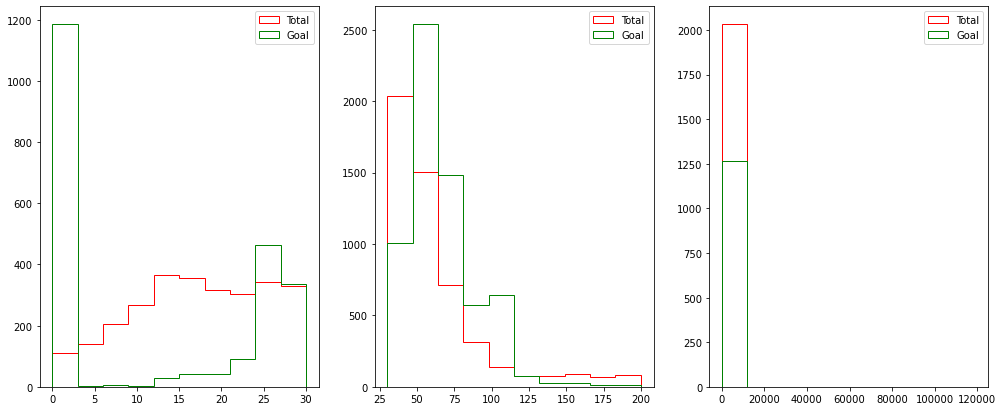

In [40]:
nutrient_charts(data,"total_sugar","goal_sugar",30,200)

In [41]:
print(len(data[data.total_sugar > 2000]['user_id'].unique()))
print(len(data[data.goal_sugar > 2000]['user_id'].unique()))

1399
1090


In [42]:
ddf = pd.DataFrame(data.groupby('user_id')['total_sugar'].mean())

In [43]:
ddf[ddf['total_sugar']>500].count()

total_sugar    1746
dtype: int64

## Clustering

In [ ]:
from sklearn.cluster import KMeans
kmdf = data.drop('date',axis=1)
kmdf = kmdf.drop('food_ids',axis=1)
kmdf = kmdf.dropna()
kmeans = KMeans(init="random",random_state=42)
kmeans.fit(kmdf)


In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.n_iter_

In [ ]:
kmdf['cluster_no'] = (kmeans.labels_)

In [ ]:
kmdf[kmdf['cluster_no']==1].describe()

In [ ]:
kmdf[kmdf['cluster_no']==2].describe()

In [ ]:
kmdf[kmdf['cluster_no']==3].describe()

In [ ]:
kmdf[kmdf['cluster_no']==4].describe()

In [ ]:
kmdf[kmdf['cluster_no']==5].describe()

In [ ]:
kmdf[kmdf['cluster_no']==6].describe()

In [ ]:
kmdf[kmdf['cluster_no']==7].describe()